In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,0.0,0.0
2025-06-12 00:00:00-04:00,6009.899902,6045.430176,6003.879883,6045.259766,4669500000,0.0,0.0
2025-06-13 00:00:00-04:00,6000.560059,6026.160156,5963.209961,5976.970215,5258910000,0.0,0.0


In [4]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [5]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [6]:
sp500["Target"] = sp500["Tomorrow"] > sp500["Close"]

In [7]:
sp500 = sp500.loc["1990-01-01":].copy()

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False
...,...,...,...,...,...,...,...
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,6045.259766,True
2025-06-12 00:00:00-04:00,6009.899902,6045.430176,6003.879883,6045.259766,4669500000,5976.970215,False
2025-06-13 00:00:00-04:00,6000.560059,6026.160156,5963.209961,5976.970215,5258910000,6033.109863,True


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume","Open","High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [12]:
preds

Date
2025-01-24 00:00:00-05:00    False
2025-01-27 00:00:00-05:00     True
2025-01-28 00:00:00-05:00    False
2025-01-29 00:00:00-05:00     True
2025-01-30 00:00:00-05:00    False
                             ...  
2025-06-11 00:00:00-04:00     True
2025-06-12 00:00:00-04:00     True
2025-06-13 00:00:00-04:00     True
2025-06-16 00:00:00-04:00     True
2025-06-17 00:00:00-04:00     True
Length: 100, dtype: bool

In [13]:
precision_score(test["Target"], preds)

0.5833333333333334

<Axes: xlabel='Date'>

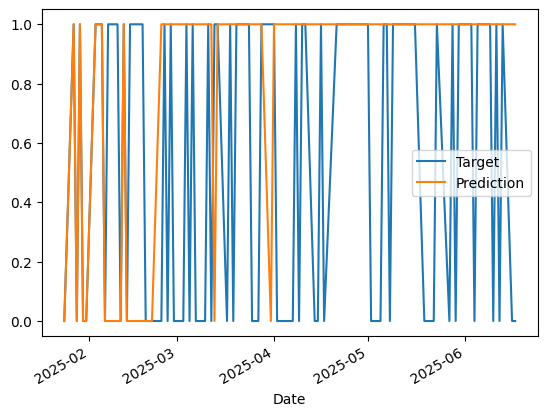

In [14]:
combined = pd.concat([test["Target"].astype(int), preds.astype(int)], axis=1)
combined.columns = ["Target", "Prediction"]  # Optional: set column names
combined.plot()

<Axes: xlabel='Date'>

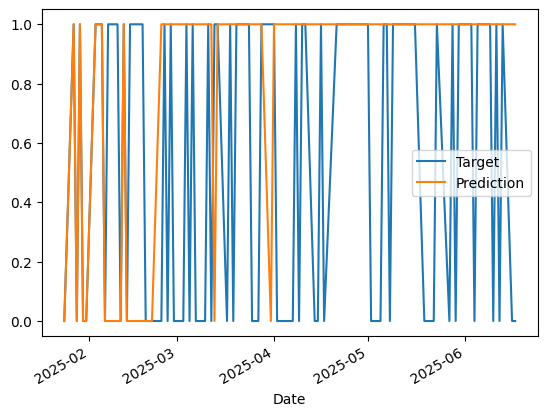

In [15]:
combined.plot()

In [16]:
precision_score(test["Target"], preds)

0.5833333333333334

In [17]:
def predict(train ,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds], axis =1)
    return combined

In [18]:
def backtest(data,model,predictors, start = 2500, step = 250):
    all_predictions = []
    for i in range(start,data.shape[0],step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)




        
    return pd.concat(all_predictions)

In [19]:
prediction = backtest(sp500,model,predictors)

In [20]:
prediction["Predictions"].value_counts()

Predictions
False    3766
True     2665
Name: count, dtype: int64

In [21]:
precision_score(prediction["Target"], prediction["Predictions"])

0.5298311444652908

In [22]:
prediction["Target"].value_counts() / prediction.shape[0]

Target
True     0.536464
False    0.463536
Name: count, dtype: float64

In [23]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,6045.259766,True,0.998626,1.0,1.003486,3.0,1.064516,36.0,1.049378,144.0,1.275963,532.0
2025-06-12 00:00:00-04:00,6009.899902,6045.430176,6003.879883,6045.259766,4669500000,5976.970215,False,1.001908,1.0,1.003777,4.0,1.067231,37.0,1.052931,144.0,1.280331,533.0
2025-06-13 00:00:00-04:00,6000.560059,6026.160156,5963.209961,5976.970215,5258910000,6033.109863,True,0.994320,1.0,0.993210,3.0,1.054240,36.0,1.040643,143.0,1.265398,532.0


In [25]:
sp500 = sp500.dropna()

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,False,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,True,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,True,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,False,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,False,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-10 00:00:00-04:00,6009.910156,6043.009766,6000.279785,6038.810059,4882880000,6022.240234,False,1.002734,2.0,1.007975,4.0,1.068538,37.0,1.052740,145.0,1.279962,532.0
2025-06-11 00:00:00-04:00,6049.379883,6059.399902,6002.319824,6022.240234,5111550000,6045.259766,True,0.998626,1.0,1.003486,3.0,1.064516,36.0,1.049378,144.0,1.275963,532.0
2025-06-12 00:00:00-04:00,6009.899902,6045.430176,6003.879883,6045.259766,4669500000,5976.970215,False,1.001908,1.0,1.003777,4.0,1.067231,37.0,1.052931,144.0,1.280331,533.0


In [27]:
model = RandomForestClassifier(n_estimators=200,min_samples_split = 50, random_state=1)

In [28]:
def predict(train ,test,predictors,model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.55] = 1
    preds[preds < 0.55] = 0
    preds = pd.Series(preds,index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds], axis =1)
    return combined

In [29]:
prediction = backtest(sp500, model, new_predictors)

In [30]:
prediction["Predictions"].value_counts()

Predictions
0.0    3115
1.0    2315
Name: count, dtype: int64

In [31]:
precision_score(prediction["Target"], prediction["Predictions"])

0.5628509719222462